In [ ]:
#당뇨병 수치 예측

In [40]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [41]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [42]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [44]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [45]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [46]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [47]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [48]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [49]:
LEARNING_RATE = 0.01

In [52]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 25000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2920.4816
Iteration 2000 : Loss 2918.8506
Iteration 3000 : Loss 2917.3479
Iteration 4000 : Loss 2915.9625
Iteration 5000 : Loss 2914.6845
Iteration 6000 : Loss 2913.5048
Iteration 7000 : Loss 2912.4151
Iteration 8000 : Loss 2911.4078
Iteration 9000 : Loss 2910.4761
Iteration 10000 : Loss 2909.6138
Iteration 11000 : Loss 2908.8151
Iteration 12000 : Loss 2908.0748
Iteration 13000 : Loss 2907.3882
Iteration 14000 : Loss 2906.7509
Iteration 15000 : Loss 2906.1589
Iteration 16000 : Loss 2905.6087
Iteration 17000 : Loss 2905.0968
Iteration 18000 : Loss 2904.6204
Iteration 19000 : Loss 2904.1765
Iteration 20000 : Loss 2903.7627
Iteration 21000 : Loss 2903.3765
Iteration 22000 : Loss 2903.0160
Iteration 23000 : Loss 2902.6791
Iteration 24000 : Loss 2902.3639
2.86 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2873.881244099165)

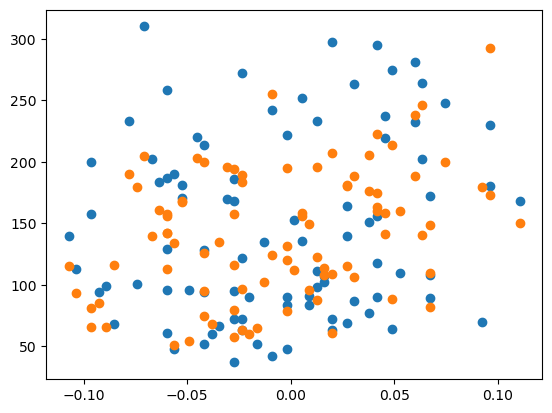

In [54]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
#자전거 수요예측

In [55]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [56]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

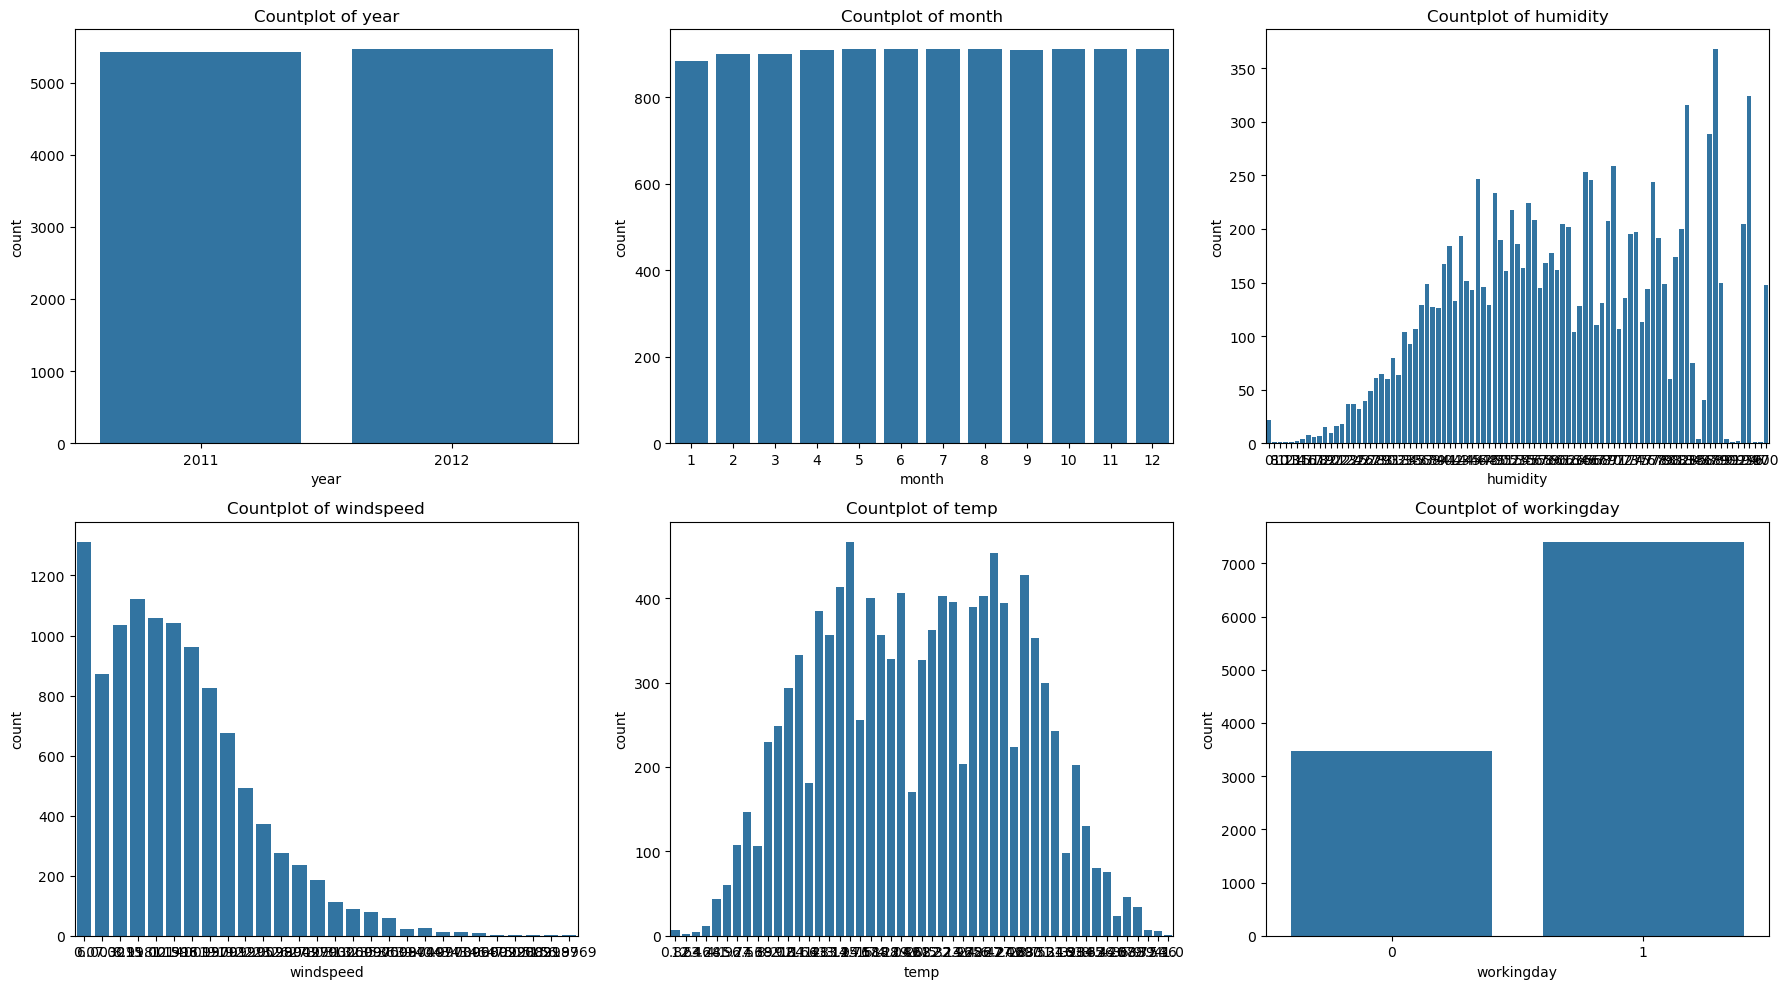

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'humidity', 'windspeed', 'temp', 'workingday']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [66]:
features = ['year', 'month', 'humidity', 'windspeed', 'temp', 'workingday']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
#목표한 RMSE 150 보다 아주 미세하게 낮고 손실률이 매우 높음

MSE: 22337.079106363173
RMSE: 149.45594369700783


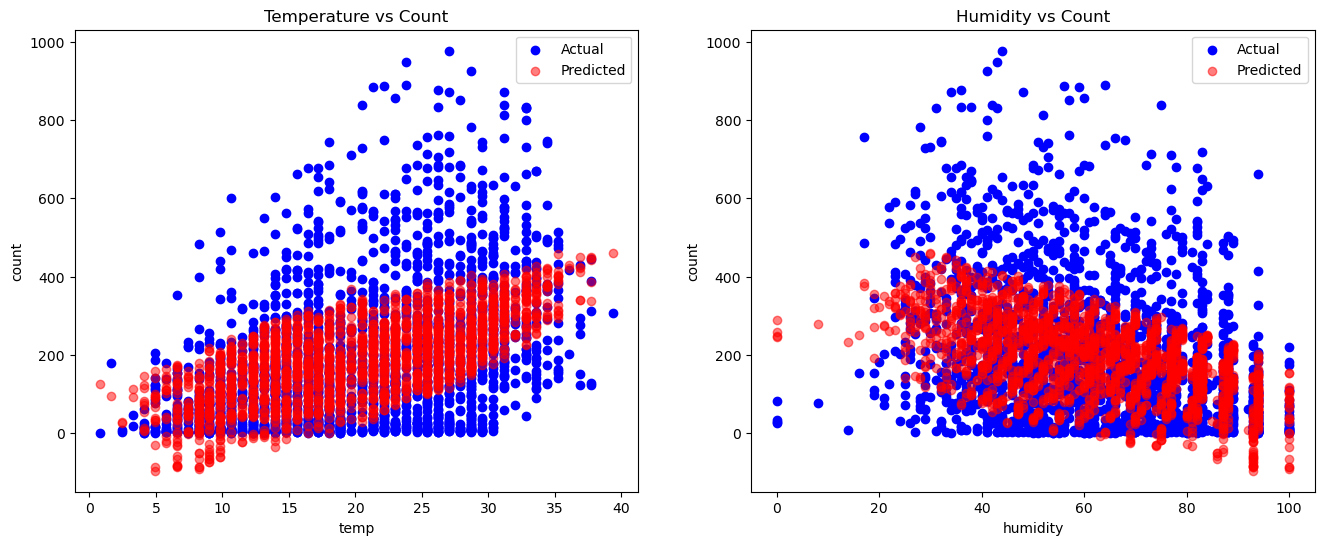

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [76]:
#손실율을 낮추기 위해 피쳐를 추가
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed', 'workingday', 'atemp', 'weather', 'holiday', 'casual']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
#기존에 비해 손실율은 대략 50% 감

MSE: 12440.843482344068
RMSE: 111.53852913833886


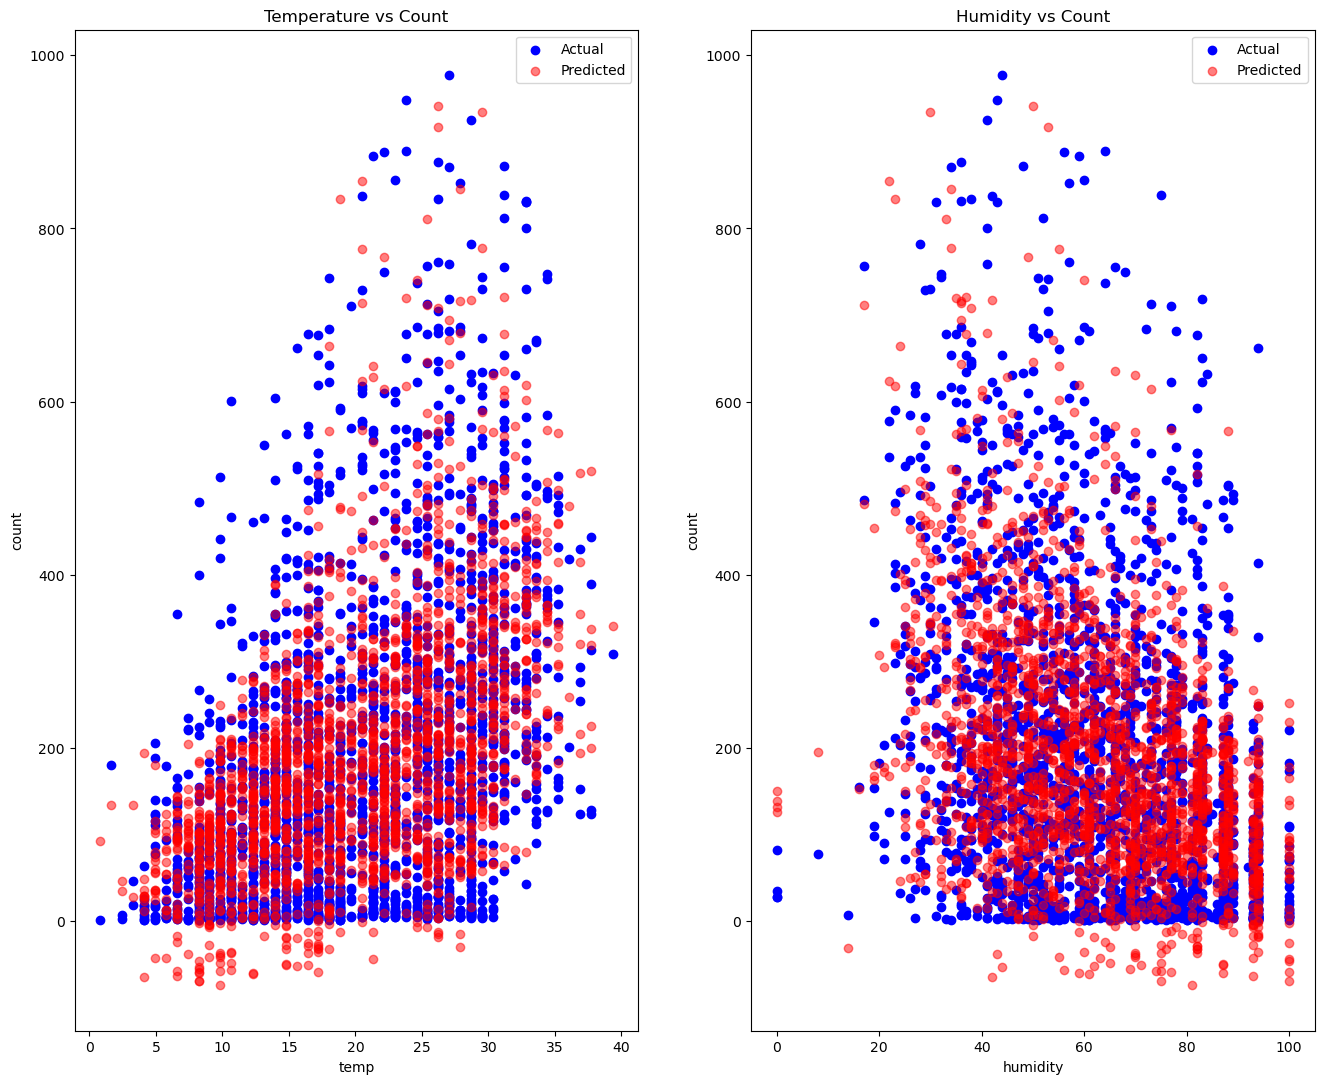

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(16, 13))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()
#시각화했을때도 기존 시각화자료 보다 일치함이 보